<a href="https://colab.research.google.com/github/kaizenagility/30-days-of-react/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Bootcamp Spring 2021 Final Project**
<br>
*David Cohen, Eddie Huang, Shelby Liu, Kai Zhang*
<br>
<br>
Our project aims to answer the question: What makes people happy? By analyzing data from the World Happiness Report, we attempt to answer this question by comparing various factors contributing to happiness across select countries and regions. The two datasets we used in this project are the World Happiness Report in 2021, and the composite World Happiness Report from 2007 to 2020. We looked at metrics that correlate to overall "ladder score," or happiness score, include: GDP per capita, level of social supports, healthy life expectancy, and the freedom to make life choices. In order to understand which of these metrics has the strongest influence on happiness, we ran regressions on "ladder score" in 2021 against each of the metrics in 2021. We then selected 3 countries and plotted each of the metrics over time against their respective "ladder scores" in order to compare the impact of different factors in different national and regional contexts. Below is our analysis. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# World Happiness Report 2021

## Cleaning Data

In [5]:
# This is our first dataset. It contains data from the World Happiness Report from 2021. 
df21 = pd.read_csv("world-happiness-report-2021.csv")
df21

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [ ]:
# Checking to see if there are any null values in the dataset. In this case, there are none. 
df21.isnull().values.any()

False

In [8]:
# Renaming columns to make them easier to work with.
df21 = df21.rename(columns={'Ladder score':'ladder_score','Logged GDP per capita':'logged_gdp_per_cap',
                           'Healthy life expectancy':'life_exp', 'Country name':'country',
                           'Social support':'social_support', 'Regional indicator':'region',
                           'Freedom to make life choices':'freedom_life_choices'})
df21

,country,region,ladder_score,Standard error of ladder score,upperwhisker,lowerwhisker,logged_gdp_per_cap,social_support,life_exp,freedom_life_choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [96]:
# This is our second dataset. It contains data from the World Happiness Report over a range of years, primarily between 2008 and 2020, 
# but going as far back as 2007 for a few countries. 
df = pd.read_csv("world-happiness-report.csv")
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [10]:
# Checking if there are any null values in the dataset. In this case there are, so we will remove them.
df.isnull().values.any()

True

In [11]:
# Removing the null values and cleaning the data. 
df = df.dropna()

In [12]:
# Renaming certain columns to make them easier to work with. 
df = df.rename(columns={'Life Ladder':'ladder_score','Log GDP per capita':'logged_gdp_per_cap',
                       'Healthy life expectancy at birth':'life_exp', 'Country name':'country',
                       'Social support':'social_support',
                      'Freedom to make life choices':'freedom_life_choices'})
df

# We will start by looking at df21 then df afterwards

,country,year,ladder_score,logged_gdp_per_cap,social_support,life_exp,freedom_life_choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


# Part 1: Log GDP per Capita

In [13]:
# Running a regression of ladder score against logged gdp per capita. 
reg1 = smf.ols('ladder_score ~ logged_gdp_per_cap', df21).fit()

In [14]:
# Getting a general idea of the regression's output by looking at the parameters. 
reg1.params

Intercept            -1.371906
logged_gdp_per_cap    0.732039
dtype: float64

In [15]:
# Printing the entire regression summary to analyze it more in depth. 
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:           ladder_score   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     243.7
Date:                Mon, 17 May 2021   Prob (F-statistic):           5.23e-33
Time:                        22:04:41   Log-Likelihood:                -148.73
No. Observations:                 149   AIC:                             301.5
Df Residuals:                     147   BIC:                             307.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.3719      0

R squared is 62.4%, showing that 62.4% of the variance in Ladder Score can be explained by Logged GDP Per Capita. The coefficient for Logged GDP Per Capita is 0.732, meaning that when Logged GDP Per Capita increases by 1, overall hapiness score increases by 0.732.
<br>
<br>
This R squared is a significant number, showing that the amount that the economic production per capita has a strong impact on overall level of happiness. This makes sense because people in a country with more financial means, experience less poverty and live more comfortably, which is the basis for a happier lifestyle.
 

In [16]:
# Predicting our yhat based on this regression. 
df21['yhat'] = reg1.predict()

Text(0.5, 0, 'Logged GDP Per Capita')

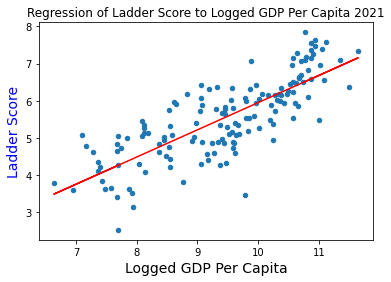

In [17]:
# Plotting our yhat. We can see that there is a strong positive correlation between logged GDP per capita and 
# ladder score, reflecting the high r squared from the regression. 
fig,ax = plt.subplots()

ax.set_title('Regression of Ladder Score to Logged GDP Per Capita 2021', size=12)
df21.plot.scatter(x='logged_gdp_per_cap',y='ladder_score', ax=ax)
df21.set_index('logged_gdp_per_cap')['yhat'].plot(color='r',ax=ax)
ax.set_ylabel("Ladder Score",color="b",fontsize=14)
ax.set_xlabel("Logged GDP Per Capita",color='black',fontsize=14)

### World Happiness Report - All Time

After cleaning the data, we selected three countries and analyzed the data for these countries over time, in order to get a more detailed view into how happiness scores have changed relative to GDP per capita. 
<br>
1) Afghanistan (Third World Country) -- lowest happiness score
<br>
2) United States (First World Country)
<br>
3) Denmark -- second highest happiness score

In [18]:
# Selecting just Afghanistan's ladder score and logged gdp per capita, and putting this data into a new 
# datframe called df_afghan. 
df_afghan_gdp = pd.DataFrame({'ladder_score': df.loc[df['country']=='Afghanistan','ladder_score'], 
                          'logged_gdp_per_cap': df.loc[df['country']=='Afghanistan','logged_gdp_per_cap'],
                          'year': df.loc[df['country']=='Afghanistan','year']})
df_afghan_gdp.set_index('year')

,ladder_score,logged_gdp_per_cap
year,,
2008,3.724,7.370
2009,4.402,7.540
2010,4.758,7.647
2011,3.832,7.620
2012,3.783,7.705
2013,3.572,7.725
2014,3.131,7.718
2015,3.983,7.702
2016,4.220,7.697


In [19]:
# Selecting just the United State's ladder score and logged gdp per capita, we put this data into a new 
# dataframe called df_us. 
df_us_gdp = pd.DataFrame({'ladder_score': df.loc[df['country']=='United States','ladder_score'], 
                          'logged_gdp_per_cap': df.loc[df['country']=='United States','logged_gdp_per_cap'],
                          'year': df.loc[df['country']=='United States','year']})
df_us_gdp.set_index('year')

,ladder_score,logged_gdp_per_cap
year,,
2008,7.280,10.922
2009,7.158,10.888
2010,7.164,10.905
2011,7.115,10.913
2012,7.026,10.928
2013,7.249,10.939
2014,7.151,10.956
2015,6.864,10.977
2016,6.804,10.986


In [20]:
# Selecting just Denmark's ladder score and logged gdp per capita, we put this data into a new 
# dataframe called df_denmark. 
df_denmark_gdp = pd.DataFrame({'ladder_score': df.loc[df['country']=='Denmark','ladder_score'], 
                          'logged_gdp_per_cap': df.loc[df['country']=='Denmark','logged_gdp_per_cap'],
                          'year': df.loc[df['country']=='Denmark','year']})
df_denmark_gdp.set_index('year')

,ladder_score,logged_gdp_per_cap
year,,
2007,7.834,10.891
2008,7.971,10.880
2009,7.683,10.824
2010,7.771,10.839
2011,7.788,10.848
2012,7.520,10.846
2013,7.589,10.851
2014,7.508,10.862
2015,7.514,10.878


Text(0.5, 0, 'Year')

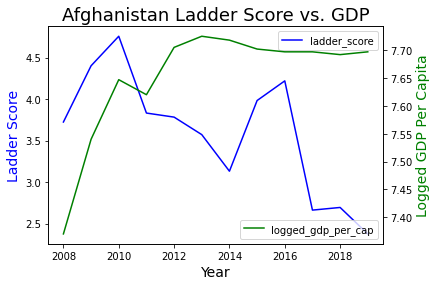

In [21]:
# Visualizing the relationship between Afghanistan's ladder score and logged gdp per capita:
fig,ax = plt.subplots()
ax2=ax.twinx()
ax.set_title('Afghanistan Ladder Score vs. GDP', size=18)
df_afghan_gdp.plot(x='year',y='ladder_score',color='blue',ax=ax)
df_afghan_gdp.plot(x='year',y='logged_gdp_per_cap',color='green',ax=ax2)
ax.set_ylabel("Ladder Score",color="blue",fontsize=14)
ax2.set_ylabel("Logged GDP Per Capita",color="green",fontsize=14)
ax.set_xlabel("Year",color='black',fontsize=14)

As we can see from the plot above, even while Afghanistan's GDP has been rising over time, its ladder score (happiness score) is declining. This initially seems strange because our original regression of GDP on ladder score showed a positive correlation between GDP and ladder score, and this is representing a small negative correlation (-.27, as we will show later on). However, when we look at other factors, such as healthy life expectancy and freedom to make life choices, which we will examine later on, these other factors help explain the downward trend in ladder score, and what might be causing Afghanistan people to become less happy even though they are producing more economically. 


A little historical context: In 2009, the U.S. increased its military presence in Afghanistan, with a temporary mission to protect the population from Taliban attacks while stabilizing the government, with a timetable for withdrawing troops, which it continually pushed back because it failed to meet expected objectives. Insurgent attacks and civilian casualties remained high under U.S. occupation. Local military and police units were not able to hold off the Taliban when the U.S. and NATO combat mission officially withdrew in December 2014. As you can see from the graph above, there appears to be a sharp decline in ladder score during U.S. military occupation between 2009 and 2014, with a sharp rise in happiness levels when the troops first withdrew in 2014. During the first year of the the Trump administration, U.S. again increased its presence in Afghanistan by 50%, citing continued regional instability. This was followed by another sharp decrease in happiness in spite of higher GDP per capita since 2013 than levels previous to U.S. occupation in 2009.  

Text(0.5, 0, 'Year')

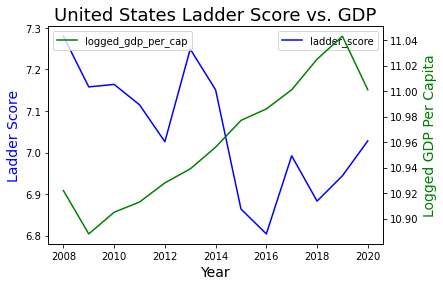

In [22]:
# Visualizing the relationship between the Unted States's ladder score and logged gdp per capita:
fig,ax = plt.subplots()
ax2=ax.twinx()
ax.set_title('United States Ladder Score vs. GDP', size=18)
df_us_gdp.plot(x='year',y='ladder_score',color='blue',ax=ax)
df_us_gdp.plot(x='year',y='logged_gdp_per_cap',color='green',ax=ax2)
ax.set_ylabel("Ladder Score",color="blue",fontsize=14)
ax2.set_ylabel("Logged GDP Per Capita",color="green",fontsize=14)
ax.set_xlabel("Year",color='black',fontsize=14)

Interestingly enough, we also see a negative relationship between ladder score and logged GDP per capita in the United States over the past 12 years. This time, it is even more pronounced and the corrleation is even more negative (-.70 as we will show later on). It seems that people in the United States are demonstrating that perhaps money does not buy happiness and an increase in GDP does not necessarily have a positive influence on happiness scores. This may be surprising and counterintuitive. 

However, here again, other factors not explained by GDP per capita must be taken into consideration. For instance, even though the average GDP is increasing, the Gini Index, or rate of inequality between the wealthy and poor is also increasing, so it is not clear from this data whether the median income for middle class and lower class Americans is increasing during this time period. In our later analyses, we show that life expectancy is actually decreasing over this period, as the U.S. battles an opioid addiction crisis, obesity, and increases in suicide rates and mental illness, which are surprisongly, uncorrelated to rise in GDP.

Text(0.5, 0, 'Year')

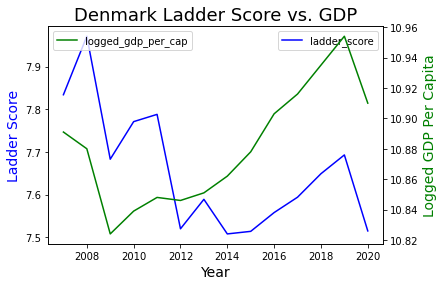

In [23]:
# Visualizing the relationship between Denmark's ladder score and logged gdp per capita:
fig,ax = plt.subplots()
ax2=ax.twinx()
ax.set_title('Denmark Ladder Score vs. GDP', size=18)
df_denmark_gdp.plot(x='year',y='ladder_score',color='blue',ax=ax)
df_denmark_gdp.plot(x='year',y='logged_gdp_per_cap',color='green',ax=ax2)
ax.set_ylabel("Ladder Score",color="blue",fontsize=14)
ax2.set_ylabel("Logged GDP Per Capita",color="green",fontsize=14)
ax.set_xlabel("Year",color='black',fontsize=14)

Compared to Afghanistan and the United States which show GDP as negatively correlated with ladder score, Denmark's ladder score and GDP per capita show a positive correlation, tracking closely in patterns of increase and decrease over the time period. 

This may make sense intuitively, suggesting that compared to the U.S., the rise GDP per capita is also more representative of the average person's rise in quality of life, given the relative social equality in Danish society. This intuition is also supported in our later analysis, when we look at other factors for happiness, including social supports.

In [24]:
# Showing the correlations between ladder score and logged gdp per capita for Afghanistan, US, and Denmark, 
# respectively. 
print(df_afghan_gdp['ladder_score'].corr(df_afghan_gdp['logged_gdp_per_cap']))
print(df_us_gdp['ladder_score'].corr(df_us_gdp['logged_gdp_per_cap']))
print(df_denmark_gdp['ladder_score'].corr(df_denmark_gdp['logged_gdp_per_cap']))

-0.2964703438577877
-0.7046829989476497
-0.07477635691544576


### Machine Learning

Our team then decided to run some machine learning tests in order to further our understanding of what factors have the most influence on a country's happiness score. 

#### Linear Regression

In [25]:
# First we ran linear regression models.
from sklearn.linear_model import LinearRegression as linreg

In [26]:
# Training our linear regression model of ladder score on logged gdp per capita. 
sklearn_reg = linreg().fit(X = df21[['logged_gdp_per_cap']], y = df21['ladder_score'])

In [27]:
# Scoring the model
sklearn_reg.score(X = df21[['logged_gdp_per_cap']], y = df21['ladder_score'])

0.6237203782313991

In [28]:
# Using the model to predict our yhat
df21['yhat_machine'] = sklearn_reg.predict(X=df21[['logged_gdp_per_cap']])

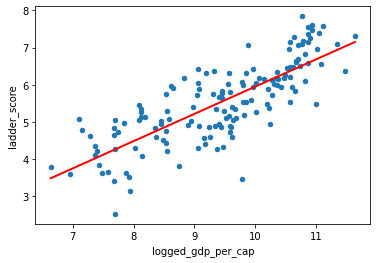

In [29]:
# Plotting our yhat
df21.plot.scatter(x='logged_gdp_per_cap', y='ladder_score')
df21.sort_values('logged_gdp_per_cap').set_index('logged_gdp_per_cap')['yhat_machine'].plot(color='r', lw=2)

#### K Nearest Neighbors

In [30]:
# Next, we ran K Nearest Neighbors models. 
from sklearn.neighbors import KNeighborsRegressor as knn

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Training the model on 75% of the data while leaving the other 25% as test data. 
X_train, X_test, y_train, y_test = train_test_split(df21[['logged_gdp_per_cap']],df21['ladder_score'],train_size=.75)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


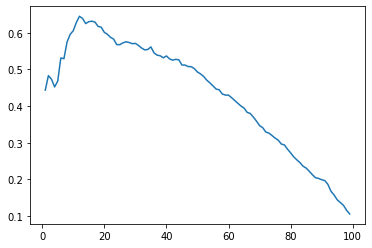

In [33]:
# Finding what number of neighbors yeilds the highest score. 
scores = pd.Series()
for i in range(1,100):
    sklearn_knn = knn(n_neighbors=i).fit(X = X_train,y = y_train)
    scores.loc[i] = sklearn_knn.score(X = X_test,y = y_test)
scores.plot()

In [34]:
# Finding the peak in the graph, or what number of neighbors yeilds the highest score. 
x = scores.idxmax()
x

12

In [35]:
# The score when we use the ideal number of neighbors. 
scores[x]

0.6451115051206553

# Part 2: Healthy Life Expectancy at Birth

In [36]:
# starting by filtering the data to just focus on life expectancy and ladder score (2021 only)
life_expectancy = df21[["country", "region", "ladder_score", "life_exp"]]
life_expectancy.sort_values(by = "ladder_score")
life_expectancy

,country,region,ladder_score,life_exp
0,Finland,Western Europe,7.842,72.000
1,Denmark,Western Europe,7.620,72.700
2,Switzerland,Western Europe,7.571,74.400
3,Iceland,Western Europe,7.554,73.000
4,Netherlands,Western Europe,7.464,72.400
...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,48.700
145,Botswana,Sub-Saharan Africa,3.467,59.269
146,Rwanda,Sub-Saharan Africa,3.415,61.400
147,Zimbabwe,Sub-Saharan Africa,3.145,56.201


In [37]:
life_expectancy['region'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

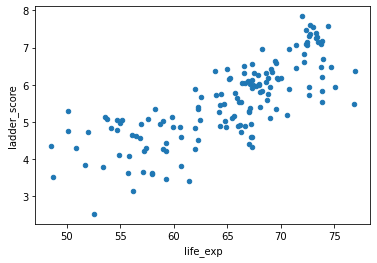

In [38]:
df21.plot.scatter(x = 'life_exp', y='ladder_score')
# seems like generally (in 2021), as life expectancy increases, ladder score also increases

#### Regressing Ladder Score on Log of Life Expectancy

In [39]:
df21['lnlife_exp'] = np.log(df21['life_exp'])
reg2 = smf.ols('ladder_score ~ lnlife_exp',df21).fit()
df21['yhat2'] = reg2.predict()

Text(0.5, 1.0, 'Regressing Ladder Score on Log of Healthy Life Exp at Birth')

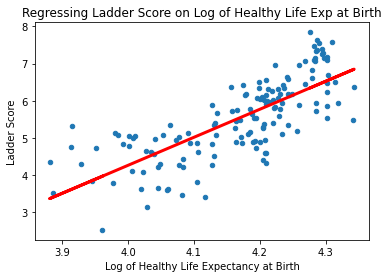

In [40]:
fig,ax = plt.subplots()
df21.plot.scatter(x='lnlife_exp',y='ladder_score',ax=ax)
df21.set_index('lnlife_exp')['yhat2'].plot(color='r',ax=ax,lw=3)
ax.set_ylabel("Ladder Score", fontsize=10)
ax.set_xlabel("Log of Healthy Life Expectancy at Birth")
ax.set_title("Regressing Ladder Score on Log of Healthy Life Exp at Birth")

In [41]:
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:           ladder_score   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     198.4
Date:                Mon, 17 May 2021   Prob (F-statistic):           4.64e-29
Time:                        22:05:37   Log-Likelihood:                -157.90
No. Observations:                 149   AIC:                             319.8
Df Residuals:                     147   BIC:                             325.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.8786      2.231    -11.601      0.0

R-squared = 0.574 <br>
57.4% of the variance in ladder score can be explained by the log of life expectancy. <br>
Coefficient = 7.532 <br>
As log of life expectancy increases by 1, ladder score increases by 7.5352 <br>
Our R-squared is significant, showing that healthy life expectancy at birth and ladder score are positively correlated. This makes sense because a country whose population is expected to live longer tends to have a better quality of life and thus, greater happiness
 

#### What can specific countries tell us about how life expectancy impacts happiness?

Overall, there seems to be a strong positive correlation between life expectancy and ladder score. But how does that look over time in specific countries? <br>
- Afghanistan (lowest ladder score 21)
- Denmark (highest ladder score 21)
- United States

In [42]:
# Afghanistan
df_afghan_lifeexp = pd.DataFrame({'ladder_score': df.loc[df['country']=='Afghanistan','ladder_score'], 
                          'life_exp': df.loc[df['country']=='Afghanistan','life_exp'],
                          'year': df.loc[df['country']=='Afghanistan','year']})
df_afghan_lifeexp.set_index('year')

,ladder_score,life_exp
year,,
2008,3.724,50.80
2009,4.402,51.20
2010,4.758,51.60
2011,3.832,51.92
2012,3.783,52.24
2013,3.572,52.56
2014,3.131,52.88
2015,3.983,53.20
2016,4.220,53.00


In [43]:
#United States
df_us_lifeexp = pd.DataFrame({'ladder_score': df.loc[df['country']=='United States','ladder_score'], 
                          'life_exp': df.loc[df['country']=='United States','life_exp'],
                          'year': df.loc[df['country']=='United States','year']})
df_us_lifeexp.set_index('year')

,ladder_score,life_exp
year,,
2008,7.280,68.38
2009,7.158,68.54
2010,7.164,68.70
2011,7.115,68.68
2012,7.026,68.66
2013,7.249,68.64
2014,7.151,68.62
2015,6.864,68.60
2016,6.804,68.50


In [44]:
# Denmark data
df_denmark_lifeexp = pd.DataFrame({'ladder_score': df.loc[df['country']=='Denmark','ladder_score'], 
                          'life_exp': df.loc[df['country']=='Denmark','life_exp'],
                          'year': df.loc[df['country']=='Denmark','year']})
df_denmark_lifeexp.set_index('year')

,ladder_score,life_exp
year,,
2007,7.834,69.92
2008,7.971,70.08
2009,7.683,70.24
2010,7.771,70.40
2011,7.788,70.62
2012,7.520,70.84
2013,7.589,71.06
2014,7.508,71.28
2015,7.514,71.50


Text(0.5, 0, 'Year')

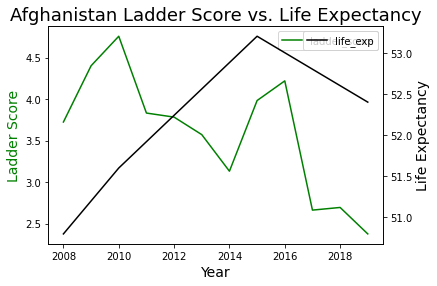

In [45]:
#Afghanistan: visualizing life expectancy and ladder score
fig,ax = plt.subplots()
ax2=ax.twinx()
ax.set_title('Afghanistan Ladder Score vs. Life Expectancy', size=18)
df_afghan_lifeexp.plot(x='year',y='ladder_score',color='green',ax=ax)
df_afghan_lifeexp.plot(x='year',y='life_exp',color='black',ax=ax2)
ax.set_ylabel("Ladder Score",color="green",fontsize=14)
ax2.set_ylabel("Life Expectancy",color="black",fontsize=14)
ax.set_xlabel("Year",color='black',fontsize=14)

Looking at the above graph, life expectancy seems to be increasing steadily in Afghanistan from the beginning of our data up until a sharp decline around 2015. This may indicate some kind of event that impacts the entire country, potentially due to conflict and war in that region. <br> <br>
Ladder score seems to decline over time overall, but sharply increases around 2010 and right before the decline in life expectancy around 2015. From ~2015, both life expectancy and ladder score decline rapidly, further signifying the influence of events happening in the country at that time and their effects on the country overall.


Text(0.5, 0, 'Year')

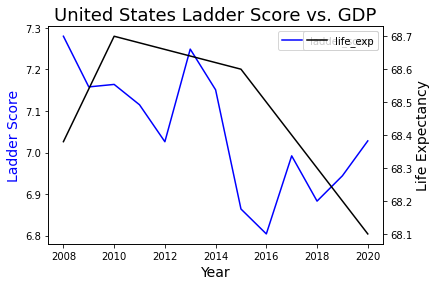

In [46]:
fig,ax = plt.subplots()
ax2=ax.twinx()
ax.set_title('United States Ladder Score vs. GDP', size=18)
df_us_lifeexp.plot(x='year',y='ladder_score',color='blue',ax=ax)
df_us_lifeexp.plot(x='year',y='life_exp',color='black',ax=ax2)
ax.set_ylabel("Ladder Score",color="blue",fontsize=14)
ax2.set_ylabel("Life Expectancy",color="black",fontsize=14)
ax.set_xlabel("Year",color='black',fontsize=14)

The United States' charts for ladder score and life expectancy look quite different. Life expectancy increases from 2008 to 2010, perhaps due to recovery from the 2008 recession, though we cannot say for certain due to lack of data pre-2008. Life expectancy then follows a steady decline from 2010 to present day, though not by very much. (only from ~68.7 to ~68.1) The rate of decline increases after 2015, throughout the four years of the Trump administration. External research reveals that increase in opioid addiction and suicide rates among young people, as well as rising maternal mortality rates in particular regions of the country, account for the decline in life expectancy. <br> <br>

Life expectancy and ladder score both decline over this period, even while GDP per capita is steadily increasing. This suggests that life expectancy may be a better predictor for happiness than GDP per capita in the U.S.

Text(0.5, 0, 'Year')

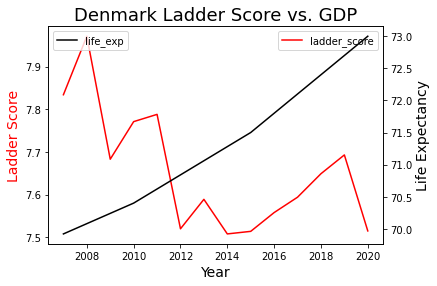

In [47]:
fig,ax = plt.subplots()
ax2=ax.twinx()
ax.set_title('Denmark Ladder Score vs. GDP', size=18)
df_denmark_lifeexp.plot(x='year',y='ladder_score',color='red',ax=ax)
df_denmark_lifeexp.plot(x='year',y='life_exp',color='black',ax=ax2)
ax.set_ylabel("Ladder Score",color="red",fontsize=14)
ax2.set_ylabel("Life Expectancy",color="black",fontsize=14)
ax.set_xlabel("Year",color='black',fontsize=14)

Denmark's life expectancy has changed the most of the 3 countries analyzed, increasing around 3 years total. Despite a steady increase in life expectancy over the 13 year period, Denmark's ladder score has been decreasing over time. This seems to show that life expectancy is not the strongest predictor for happiness in Denmark, which is still rated the second happiest country in the world in 2021, in spite of this apparent decline. We will run a couple of multiple regression analyses to look at why the lucky Danish are strangely becoming sadder, and how these metrics for happiness interact with each other.

In [48]:
print(df_afghan_lifeexp['ladder_score'].corr(df_afghan_lifeexp['life_exp']))
print(df_us_lifeexp['ladder_score'].corr(df_us_lifeexp['life_exp']))
print(df_denmark_lifeexp['ladder_score'].corr(df_denmark_lifeexp['life_exp']))

# strongest correlation between life exp and happiness in Denmark
# In the US, there is not a strong correlation between life_exp and happiness. i.e. other factors are 
# contributing more to (or hurting/impacting) ladder score

-0.38495466513280613
0.30973308271875427
-0.5910252360654485


### Multiple Regression
Do these metrics that contribute to ladder score interact with each other?

#### Life Expectancy and Log of GDP

In [49]:
reg3 = smf.ols('ladder_score ~ lnlife_exp + logged_gdp_per_cap',df21).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:           ladder_score   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 17 May 2021   Prob (F-statistic):           4.68e-34
Time:                        22:05:57   Log-Likelihood:                -143.22
No. Observations:                 149   AIC:                             292.4
Df Residuals:                     146   BIC:                             301.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -11.9631      3

R-squared = 0.651 indicates that 65.1% of the variance in ladder score can be explained by life expectancy and logged gdp per capita. But how are these two metrics correlated? Intuitively, one might think that both metrics are indicators of quality of life and financial wellness of a country's people.

In [50]:
df21[['lnlife_exp','logged_gdp_per_cap']].corr()
# life expectancy and gdp are indeed highly correlated

,lnlife_exp,logged_gdp_per_cap
lnlife_exp,1.000000,0.850699
logged_gdp_per_cap,0.850699,1.000000


#### Life Expectancy and Social Support


In [51]:
reg4 = smf.ols('ladder_score ~ lnlife_exp + social_support',df21).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:           ladder_score   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     145.7
Date:                Mon, 17 May 2021   Prob (F-statistic):           1.63e-35
Time:                        22:06:01   Log-Likelihood:                -139.80
No. Observations:                 149   AIC:                             285.6
Df Residuals:                     146   BIC:                             294.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -16.1061      2.512     -6.

Running the same regression except with social support instead of logged gdp per capita, we find another strong R-squared of 0.666. 

In [52]:
df21[['lnlife_exp','social_support']].corr()
# social support and life expectancy are not as strongly correlated as gdp and life exp, but still are strongly, positively correlated

,lnlife_exp,social_support
lnlife_exp,1.000000,0.722115
social_support,0.722115,1.000000


### World Happiness Report- All Time 
How do the means differ from medians of ladder score and life expectancy? Could the diffence in results be explained by outliers?

In [53]:
df['country'].nunique()

155

In [54]:
# not every country has the same number of entries (years)
# so I want to look at means and medians of years aggregated
means = df.groupby('country')[['country', 'ladder_score','life_exp']].mean().sort_values(by='ladder_score')
means

,ladder_score,life_exp
country,,
Central African Republic,3.515000,43.356000
Burundi,3.548200,50.916000
Togo,3.555000,52.837778
Afghanistan,3.594667,52.266667
Rwanda,3.603455,58.287273
...,...,...
Netherlands,7.466462,71.807692
Norway,7.512400,72.670000
Switzerland,7.548300,73.334000


In [55]:
medians = df.groupby('country')[['country', 'ladder_score','life_exp']].median().sort_values(by='ladder_score')
medians

,ladder_score,life_exp
country,,
Rwanda,3.4830,58.68
Central African Republic,3.5680,43.08
Botswana,3.6575,55.63
Tanzania,3.6610,54.52
Burundi,3.7060,50.68
...,...,...
Iceland,7.5010,73.00
Switzerland,7.5085,73.35
Norway,7.5115,72.95


#### Linear Regression using Machine Learning

In [56]:
from sklearn.linear_model import LinearRegression as linreg

In [57]:
sklearn_reg = linreg().fit(X = df21[['lnlife_exp']], y = df21['ladder_score'])

In [58]:
df21['yhat_machine2'] = sklearn_reg.predict(X=df21[['lnlife_exp']])

0.5744135260084713

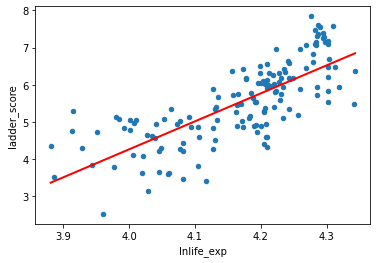

In [59]:
df21.plot.scatter(x='lnlife_exp', y='ladder_score')
df21.sort_values('lnlife_exp').set_index('lnlife_exp')['yhat_machine2'].plot(color='r', lw=2)
sklearn_reg.score(X = df21[['lnlife_exp']], y = df21['ladder_score'])

We find largely the same results as we did in our regular regression above

# Part 3: Freedom to Make Life Choices

In [72]:
# Filtering the data to look only at freedom to make life choices and ladder score in 2021.

freedom_life_choices = df21[["country", "region", "ladder_score", "freedom_life_choices"]]
freedom_life_choices = freedom_life_choices.sort_values(by="freedom_life_choices", ascending=False)
freedom_life_choices

,country,region,ladder_score,freedom_life_choices
41,Uzbekistan,Commonwealth of Independent States,6.179,0.970
5,Norway,Western Europe,7.392,0.960
113,Cambodia,Southeast Asia,4.830,0.959
3,Iceland,Western Europe,7.554,0.955
0,Finland,Western Europe,7.842,0.949
...,...,...,...,...
134,Madagascar,Sub-Saharan Africa,4.208,0.552
130,Comoros,Sub-Saharan Africa,4.289,0.548
122,Lebanon,Middle East and North Africa,4.584,0.525
108,Algeria,Middle East and North Africa,4.887,0.480


Note that Afghanistan is ranked very last, as the country with least freedom to make life choices.

If we look more closely at the countries with the most freedom to make life choices, we see that Denmark ranks relatively highly on the list, at 7th place. (The happiest country in the world, Finland, ranks 5th in freedom to make life choices.)


In [81]:
freedom_life_choices.head(10)


,country,region,ladder_score,freedom_life_choices
41,Uzbekistan,Commonwealth of Independent States,6.179,0.970
5,Norway,Western Europe,7.392,0.960
113,Cambodia,Southeast Asia,4.830,0.959
3,Iceland,Western Europe,7.554,0.955
0,Finland,Western Europe,7.842,0.949
28,Slovenia,Central and Eastern Europe,6.461,0.949
1,Denmark,Western Europe,7.620,0.946
6,Sweden,Western Europe,7.363,0.945
78,Vietnam,Southeast Asia,5.411,0.940
66,Kyrgyzstan,Commonwealth of Independent States,5.744,0.935


In [80]:
# And the United States ranks surprisingly low in freedom to make life choices, at number 61.

freedom_life_choices.head(65)

,country,region,ladder_score,freedom_life_choices
41,Uzbekistan,Commonwealth of Independent States,6.179,0.970
5,Norway,Western Europe,7.392,0.960
113,Cambodia,Southeast Asia,4.830,0.959
3,Iceland,Western Europe,7.554,0.955
0,Finland,Western Europe,7.842,0.949
...,...,...,...,...
18,United States,North America and ANZ,6.951,0.837
51,Colombia,Latin America and Caribbean,6.012,0.837
54,Nicaragua,Latin America and Caribbean,5.972,0.836
141,Tanzania,Sub-Saharan Africa,3.623,0.833


So how important is the freedom to make life choices in determining people's happiness?

In [83]:
# Running a regression of ladder score against freedom to make life choices. 
reg4 = smf.ols('ladder_score ~ freedom_life_choices', df21).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:           ladder_score   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     86.10
Date:                Mon, 17 May 2021   Prob (F-statistic):           2.05e-16
Time:                        22:20:56   Log-Likelihood:                -187.20
No. Observations:                 149   AIC:                             378.4
Df Residuals:                     147   BIC:                             384.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.9740 

R squared is 36.9%, showing that 36.9% of the variance in Ladder Score can be explained by freedom to make life choices, compared to 62.4% for GDP per capita and 57.4% for Healthy Life Expectancy. 

This shows that the freedom to make life choices has a positive correlation with overall level of happiness, though the impact is not as strong as wealth or health. 

Text(0.5, 0, 'Freedom to Make Life Choices')

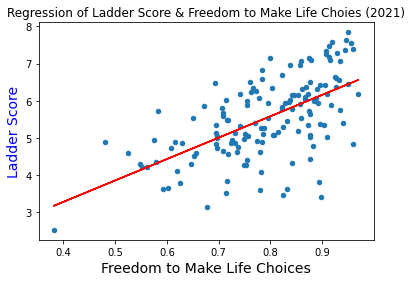

In [84]:
# Predicting our yhat based on this regression. 
df21['yhat_freedom'] = reg4.predict()

# Plotting our yhat. We can see that there is a positive correlation between freedom to  
# make life choices and ladder score, reflecting the high r squared from the regression. 
fig,ax = plt.subplots()

ax.set_title('Regression of Ladder Score & Freedom to Make Life Choies (2021)', size=12)
df21.plot.scatter(x='freedom_life_choices',y='ladder_score', ax=ax)
df21.set_index('freedom_life_choices')['yhat_freedom'].plot(color='r',ax=ax)
ax.set_ylabel("Ladder Score",color="b",fontsize=14)
ax.set_xlabel("Freedom to Make Life Choices",color='black',fontsize=14)

### Comparing across select countries

Now we look at the same three countries: Afghanistan, United States, and Denmark, to compare the correlation between happiness and freedom to make life choices over time, from 2008 to 2020.

Text(0.5, 0, 'Year')

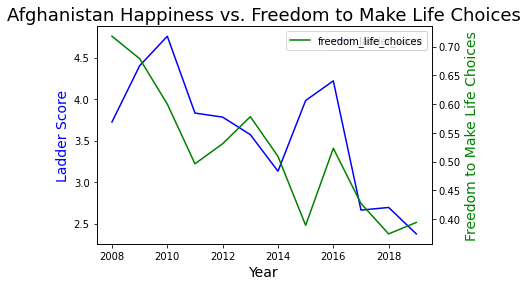

In [86]:
# Afghanistan

df_afghan_freedom = pd.DataFrame({'ladder_score': df.loc[df['country']=='Afghanistan','ladder_score'], 
                          'freedom_life_choices': df.loc[df['country']=='Afghanistan','freedom_life_choices'],
                          'year': df.loc[df['country']=='Afghanistan','year']})
df_afghan_freedom.set_index('year')

# Visualizing the relationship between Afghanistan's ladder score and freedom to make life choices:
fig,ax = plt.subplots()
ax2=ax.twinx()
ax.set_title('Afghanistan Happiness vs. Freedom to Make Life Choices', size=18)
df_afghan_freedom.plot(x='year',y='ladder_score',color='blue',ax=ax)
df_afghan_freedom.plot(x='year',y='freedom_life_choices',color='green',ax=ax2)
ax.set_ylabel("Ladder Score",color="blue",fontsize=14)
ax2.set_ylabel("Freedom to Make Life Choices",color="green",fontsize=14)
ax.set_xlabel("Year",color='black',fontsize=14)

Recall the earlier graph between GDP per capita and ladder score in Afghanistan. There was a noticeable divergence as GDP per capita was rising over time, while happiness was dropping.

Compared to GDP, we see here that happiness (blue line) and freedom to make life choices (green lines) actually track closely together over time from 2008 to 2018. This variable may provide a better explanation for declining happiness in Afghanistan between 2009 and 2014, the dates of U.S. military occupation in Afghanistan. The brief period from 2014 to 2016 when U.S. began withdrawing troops from Afghanistan shows an increase in freedom to make life choices for people in Afghanistan, which is also reflected in a similar increase in happiness. After 2016, with growing U.S. military presence during the Trump administration, the freedom to make life choices once again drops to an all-time low, along with happiness.

This shows that across all countries, while GDP per capita may be a better predictor for happiness than freedom to make life choices, in the case of Afghanistan, which is ranked lowest in the world in terms of freedom to make life choices, it seems that this variable plays a more signficant role in explaining unhappiness than GDP.


Text(0.5, 0, 'Year')

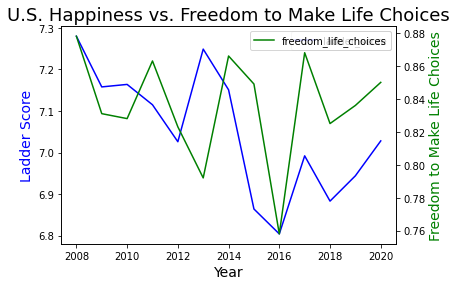

In [87]:
# United States

df_us_freedom = pd.DataFrame({'ladder_score': df.loc[df['country']=='United States','ladder_score'], 
                          'freedom_life_choices': df.loc[df['country']=='United States','freedom_life_choices'],
                          'year': df.loc[df['country']=='United States','year']})
df_us_freedom.set_index('year')

# Visualizing the relationship between U.S. ladder score and freedom to make life choices:
fig,ax = plt.subplots()
ax2=ax.twinx()
ax.set_title('U.S. Happiness vs. Freedom to Make Life Choices', size=18)
df_us_freedom.plot(x='year',y='ladder_score',color='blue',ax=ax)
df_us_freedom.plot(x='year',y='freedom_life_choices',color='green',ax=ax2)
ax.set_ylabel("Ladder Score",color="blue",fontsize=14)
ax2.set_ylabel("Freedom to Make Life Choices",color="green",fontsize=14)
ax.set_xlabel("Year",color='black',fontsize=14)

Recall in earlier graphs how, similar to Afghanistan, when U.S. GDP per capita increased, happiness actually decreased over the period from 2008 to 2020? 

In the United States as in Afghanistan, instead of the divergent relationship that we saw between GDP per capita and ladder score, there is a strong temporal convergence between the freedom to make life choices (green line) and happiness (blue line). 

Text(0.5, 0, 'Year')

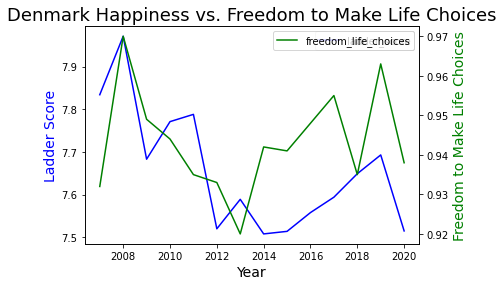

In [88]:
# Denmark

df_denmark_freedom = pd.DataFrame({'ladder_score': df.loc[df['country']=='Denmark','ladder_score'], 
                          'freedom_life_choices': df.loc[df['country']=='Denmark','freedom_life_choices'],
                          'year': df.loc[df['country']=='Denmark','year']})
df_denmark_freedom.set_index('year')

# Visualizing the relationship between Danish ladder score and freedom to make life choices:
fig,ax = plt.subplots()
ax2=ax.twinx()
ax.set_title('Denmark Happiness vs. Freedom to Make Life Choices', size=18)
df_denmark_freedom.plot(x='year',y='ladder_score',color='blue',ax=ax)
df_denmark_freedom.plot(x='year',y='freedom_life_choices',color='green',ax=ax2)
ax.set_ylabel("Ladder Score",color="blue",fontsize=14)
ax2.set_ylabel("Freedom to Make Life Choices",color="green",fontsize=14)
ax.set_xlabel("Year",color='black',fontsize=14)

In Denmark, the 7th freest country in the world, which ranks far above the United States (#61) and Afghanistan (#146), there is also a close temporal relationship between happiness and the freedom to make life choices. 

It looks like Denmark became less free between 2008 and 2012, perhaps due to the global financial crisis; but it made some recovery between 2014 and 2019, only to dip again in 2019. 


In [89]:
# Showing the correlations between ladder score and freedom to make life choices for Afghanistan, US, and Denmark, 
# respectively. 
print(df_afghan_freedom['ladder_score'].corr(df_afghan_freedom['freedom_life_choices']))
print(df_us_freedom['ladder_score'].corr(df_us_freedom['freedom_life_choices']))
print(df_denmark_freedom['ladder_score'].corr(df_denmark_freedom['freedom_life_choices']))

0.6243975122814889
0.35173561712060714
0.3864047702258114


The freedom to make life choices seems to have the strongest correlation with happiness in Afghanistan, where its levels are lowest. Perhaps freedom, like sane government, is most strongly felt in its absence.

# Part 4: Social Support

#### Re-cleaning some parts of the data

In [ ]:
df.head()

,country,year,ladder_score,logged_gdp_per_cap,social_support,life_exp,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
df21.head()

,country,region,ladder_score,Standard error of ladder score,upperwhisker,lowerwhisker,logged_gdp_per_cap,social_support,life_exp,Freedom to make life choices,...,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,yhat,yhat_machine,lnlife_exp,yhat2,yhat_machine2
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.741,0.691,0.124,0.481,3.253,6.515815,6.515815,4.276666,6.346913,6.346913
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.763,0.686,0.208,0.485,2.868,6.631477,6.631477,4.286341,6.419818,6.419818
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.816,0.653,0.204,0.413,2.839,6.766172,6.766172,4.309456,6.593990,6.593990
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.772,0.698,0.293,0.170,2.967,6.591215,6.591215,4.290459,6.450848,6.450848
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.753,0.647,0.302,0.384,2.798,6.630745,6.630745,4.282206,6.388659,6.388659


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1708 non-null   object 
 1   year                          1708 non-null   int64  
 2   ladder_score                  1708 non-null   float64
 3   logged_gdp_per_cap            1708 non-null   float64
 4   social_support                1708 non-null   float64
 5   life_exp                      1708 non-null   float64
 6   Freedom to make life choices  1708 non-null   float64
 7   Generosity                    1708 non-null   float64
 8   Perceptions of corruption     1708 non-null   float64
 9   Positive affect               1708 non-null   float64
 10  Negative affect               1708 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 160.1+ KB


In [ ]:
# There are several NULL values present in out dataset. 
# They can be filled with the vaules in the previous rows.
df = df.bfill(axis=0)

In [ ]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     149 non-null    object 
 1   region                                      149 non-null    object 
 2   ladder_score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   logged_gdp_per_cap                          149 non-null    float64
 7   social_support                              149 non-null    float64
 8   life_exp                                    149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

Removing unnecessary columns and keeping the common features for both the 2021 and the past datasets.

In [98]:
df21 = df21.drop(
    columns=[
        "Standard error of ladder score",
        "upperwhisker",
        "lowerwhisker",
        "Explained by: Log GDP per capita",
        "Explained by: Social support",
        "Explained by: Healthy life expectancy",
        "Explained by: Freedom to make life choices",
        "Explained by: Generosity",
        "Explained by: Perceptions of corruption",
        "Dystopia + residual",
        "Ladder score in Dystopia",
        "region"
        
    ]
)

df21.head()

,country,ladder_score,logged_gdp_per_cap,social_support,life_exp,freedom_life_choices,Generosity,Perceptions of corruption,yhat,yhat_machine,lnlife_exp,yhat2,yhat_machine2,yhat_freedom,year
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,6.515815,6.515815,4.276666,6.346913,6.346913,6.439325,2021
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,6.631477,6.631477,4.286341,6.419818,6.419818,6.422048,2021
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,6.766172,6.766172,4.309456,6.593990,6.593990,6.266554,2021
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,6.591215,6.591215,4.290459,6.450848,6.450848,6.473879,2021
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,6.630745,6.630745,4.282206,6.388659,6.388659,6.232000,2021


In [99]:
df21["year"] = 2021
df3 = pd.concat([df, df21])
df3.head()

,country,year,ladder_score,logged_gdp_per_cap,social_support,life_exp,freedom_life_choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,yhat,yhat_machine,lnlife_exp,yhat2,yhat_machine2,yhat_freedom
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Correlation Matrix')

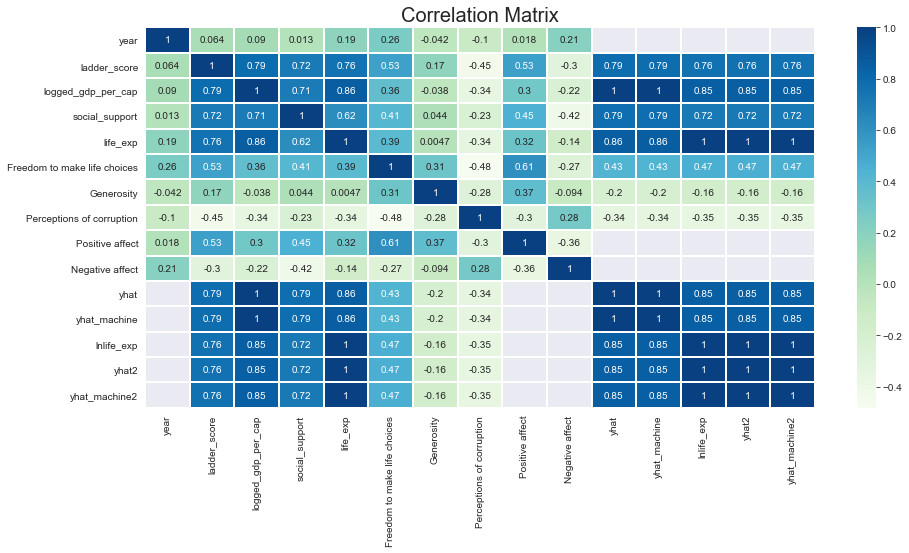

In [ ]:
corr = df3.corr()

plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.heatmap(corr, annot=True, linewidths=1, cmap="GnBu")
plt.title("Correlation Matrix", fontsize=20)

The above correlation matrix gives various insights that we can use to find correlation between the Life Ladder (Happiness Index) and other aspects.
For instance, **Happiness is strongly correlated with GDP per capita** of the country, Social Support and Life Expectancy. <br> 
If we look at the correlation between **GDP per capita and Life expectancy**, we see a strong correlation of `0.82` and it makes sense as countries with high GDP can affort better health care and hence higher life expectancy. *A healthy country is a happy country.* <br>
As far as the negative correlation is concerned, countries with low negative effect and low corruption tend to have better Life Ladder.

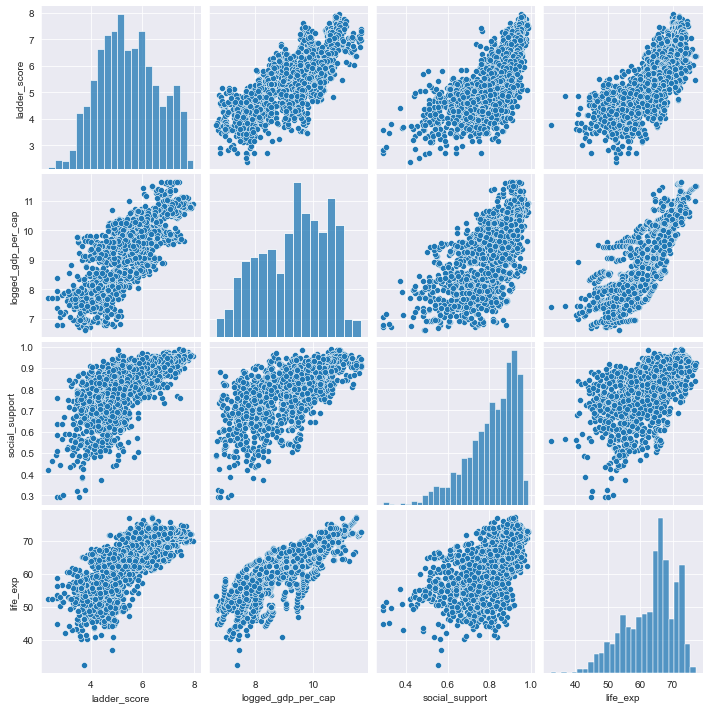

In [ ]:
features = ['ladder_score', 'logged_gdp_per_cap', 'social_support', 'life_exp']
sns.pairplot(df3[features])

The above scatterplot describes that the GDP per capita of the country, Social Support and Life Expectancy are strongly correlated with the Happiness index of a nation. A increase in these factors contributes to the overall happiness of the country. 

/Users/shelbyliu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


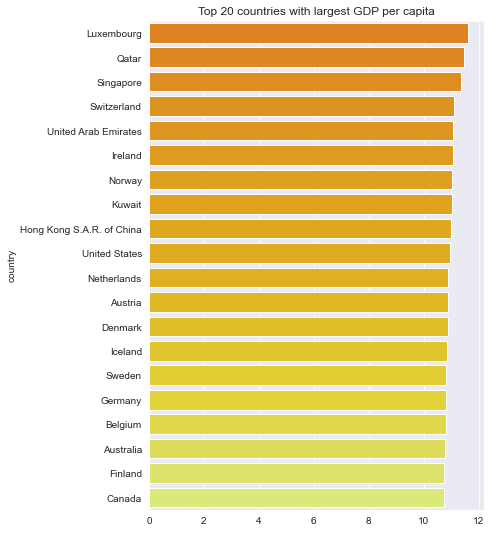

In [ ]:
x = (
    df3.groupby("country")["logged_gdp_per_cap"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)
plt.figure(figsize=(6, 9))
sns.barplot(x.values, x.index, palette= 'Wistia_r')
plt.title("Top 20 countries with largest GDP per capita")
plt.show()

/Users/shelbyliu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


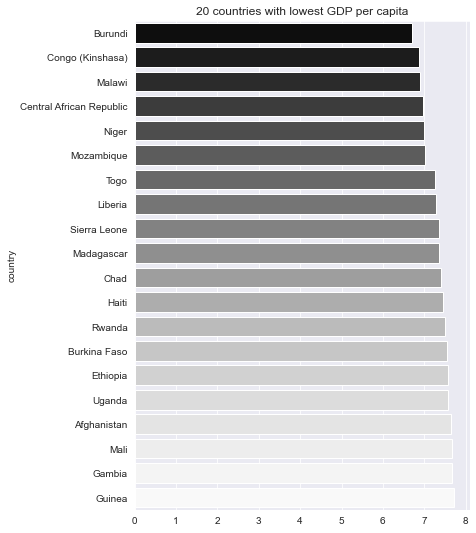

In [ ]:
x = df3.groupby("country")["logged_gdp_per_cap"].mean().sort_values().head(20)
plt.figure(figsize=(6, 9))
sns.barplot(x.values, x.index, palette= 'Greys_r')
plt.title("20 countries with lowest GDP per capita")
plt.show()

To see how various aspects contribute to the Happiness index of most happiest and the least happiest countries. Let's analyze data of Finland(among top 5 most happiest countries) and Chad (among least happiest countries).

Text(0.5, 1.0, 'Healthy life expectancy at birth')

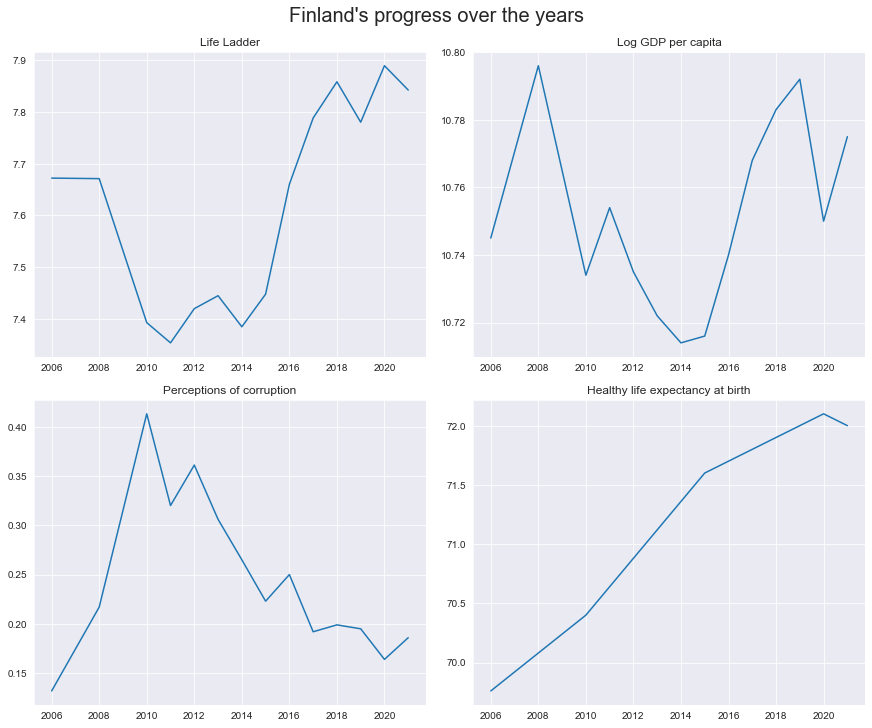

In [ ]:
finland_data = df3[df3["country"] == "Finland"]
fig, axs = plt.subplots(2, 2, constrained_layout=True)
fig.set_figwidth(12)
fig.set_figheight(10)
fig.suptitle("Finland's progress over the years", fontsize=20)
axs[0, 0].plot(finland_data["year"], finland_data["ladder_score"])
axs[0, 0].set_title("Life Ladder")
axs[0, 1].plot(finland_data["year"], finland_data["logged_gdp_per_cap"])
axs[0, 1].set_title("Log GDP per capita")
axs[1, 0].plot(finland_data["year"], finland_data["Perceptions of corruption"])
axs[1, 0].set_title("Perceptions of corruption")
axs[1, 1].plot(finland_data["year"], finland_data["life_exp"])
axs[1, 1].set_title("Healthy life expectancy at birth")


The positive trends are getting better year-by-year, for instance, the Life Ladder of Finland is on an upward trend since 2014 and so is its Life Expectancy and GDP per capita. <br>
A slump is visible in GDP in 2020 and it is because of the Novel coronavirus but still it has not dropped much as compared to the countries at the bottom. <br>
There is a downward trend in the perception of curruption in Finland since 2010 and that also relates to the upward trend in Life Ladder that too since 2010. Lower the corruption, higher is the GDP per capita of the nation. <br>
A slump is noted in 2010 in the Finland's GDP per capita, that can be due to the sudden increase in widespread corruption (among businesses or within government) in 2010.

Text(0.5, 1.0, 'Healthy life expectancy at birth')

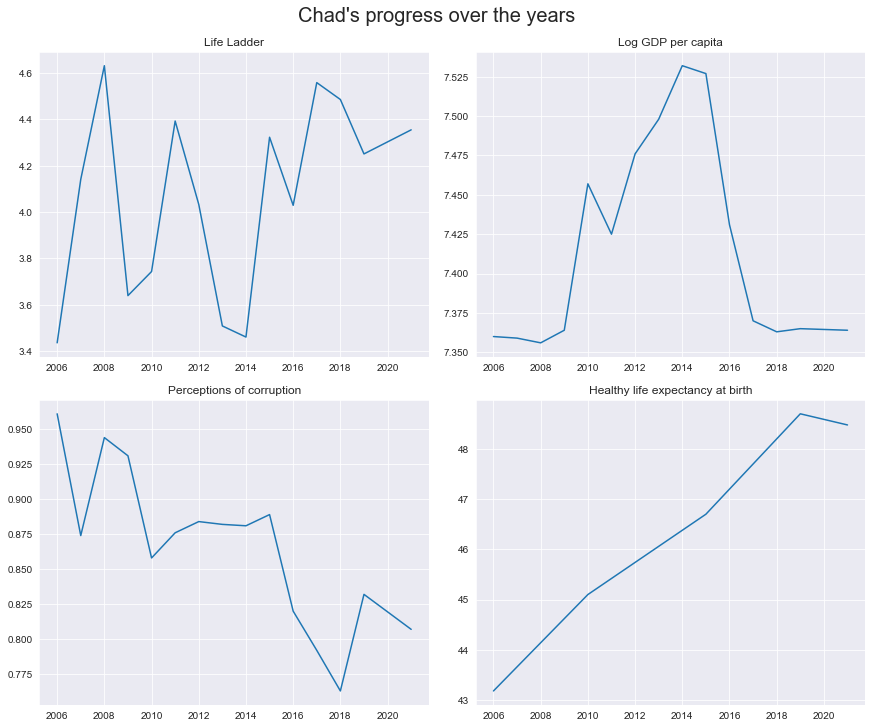

In [ ]:
chad_data = df3[df3["country"] == "Chad"]
fig, axs = plt.subplots(2, 2, constrained_layout=True)
fig.set_figwidth(12)
fig.set_figheight(10)
fig.suptitle("Chad's progress over the years", fontsize=20)
axs[0, 0].plot(chad_data["year"], chad_data["ladder_score"])
axs[0, 0].set_title("Life Ladder")
axs[0, 1].plot(chad_data["year"], chad_data["logged_gdp_per_cap"])
axs[0, 1].set_title("Log GDP per capita")
axs[1, 0].plot(chad_data["year"], chad_data["Perceptions of corruption"])
axs[1, 0].set_title("Perceptions of corruption")
axs[1, 1].plot(chad_data["year"], chad_data["life_exp"])
axs[1, 1].set_title("Healthy life expectancy at birth")

The highest of Chad's GDP per capita is still lower than lowest of Finland's GDP per capita. The GDP greatly dropped during 2015-2018 due to recession and various outbreaks in several parts of Chad. The growth of life expectancy has improved significantly from around 43.2 in 2006 to around 48 years in 2017.

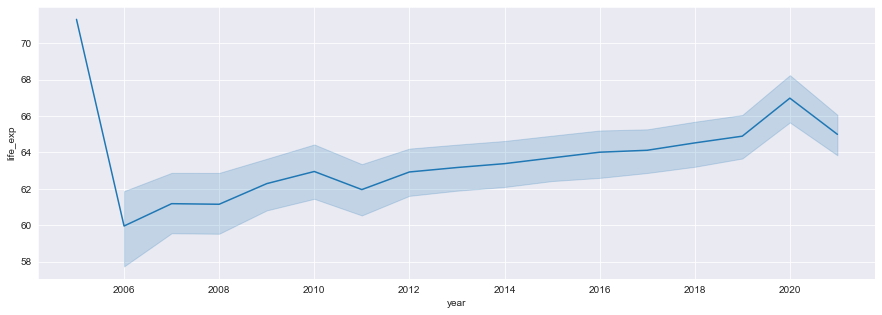

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x= "year", y= "life_exp", data= df3)
plt.show()

A positive outlook towards the world health is shown above as the life expectancy is getting better over time.

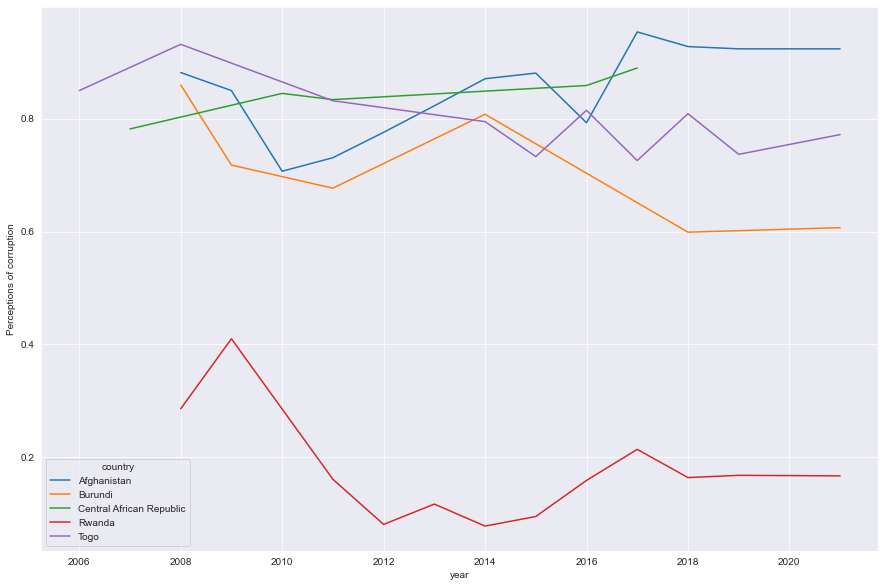

In [ ]:
lowest_five = (
    df3.groupby("country")["ladder_score"]
    .mean()
    .sort_values(ascending=True)
    .head(5)
)

lowest_five = list(lowest_five.index)

x =  df3[df3["country"].isin(lowest_five)]
plt.figure(figsize=(15,10))
sns.lineplot(x= "year", y= "Perceptions of corruption",data= x, hue= "country")
plt.show()

Above are the Perception of Corruption lines of the countries with the least happiness index. Apart from Burundi, there is a constant widespread corruption among four nations.

# Part 5: Regional Comparisons

Grouping the data by region, we can see if the factors that most strongly correlate with happiness differ by region.

Note: North America is grouped together with Australia and New Zealand.

In [88]:
# Calculating the mean values of happiness factors, as grouped by region.

regional_mean = df21.groupby('region').mean().sort_values(by = 'ladder_score', ascending=False)
regional_mean

,ladder_score,logged_gdp_per_cap,social_support,life_exp,freedom_life_choices,generosity,corruption
region,,,,,,,
North America and ANZ,7.128500,10.809500,0.933500,72.325000,0.898750,0.120000,0.449250
Western Europe,6.914905,10.822714,0.914476,73.033095,0.858714,-0.003190,0.523095
Central and Eastern Europe,5.984765,10.109059,0.887412,68.338412,0.797059,-0.078941,0.850529
Latin America and Caribbean,5.908050,9.370000,0.839500,67.076050,0.831750,-0.067700,0.792600
East Asia,5.810333,10.367667,0.860500,71.252167,0.763500,-0.062333,0.683333
Commonwealth of Independent States,5.467000,9.401833,0.872500,65.009500,0.816917,-0.036000,0.725083
Southeast Asia,5.407556,9.421444,0.820333,64.888444,0.909000,0.156333,0.709111
Middle East and North Africa,5.219765,9.666118,0.797647,65.609118,0.716471,-0.079765,0.762235
Sub-Saharan Africa,4.494472,8.075194,0.696750,55.886472,0.723194,0.013444,0.765944


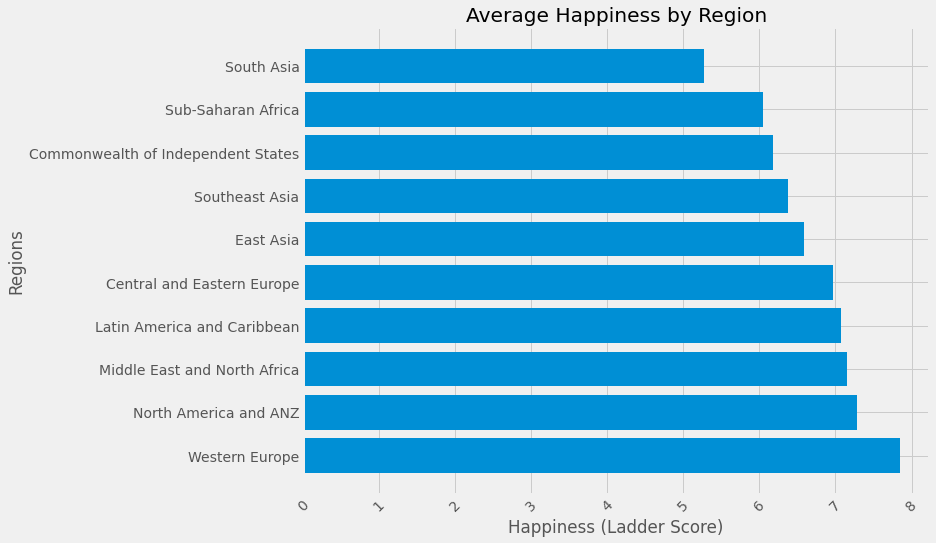

In [25]:
plt.figure(figsize=(10,8))
plt.barh(df21['region'],df21['ladder_score'])
plt.title('Average Happiness by Region')
plt.xlabel('Happiness (Ladder Score)')
plt.xticks(rotation=45)
plt.ylabel('Regions')
plt.style.use('ggplot')
plt.show()

Text(0.5, 0, 'Happiness (Ladder Score)')

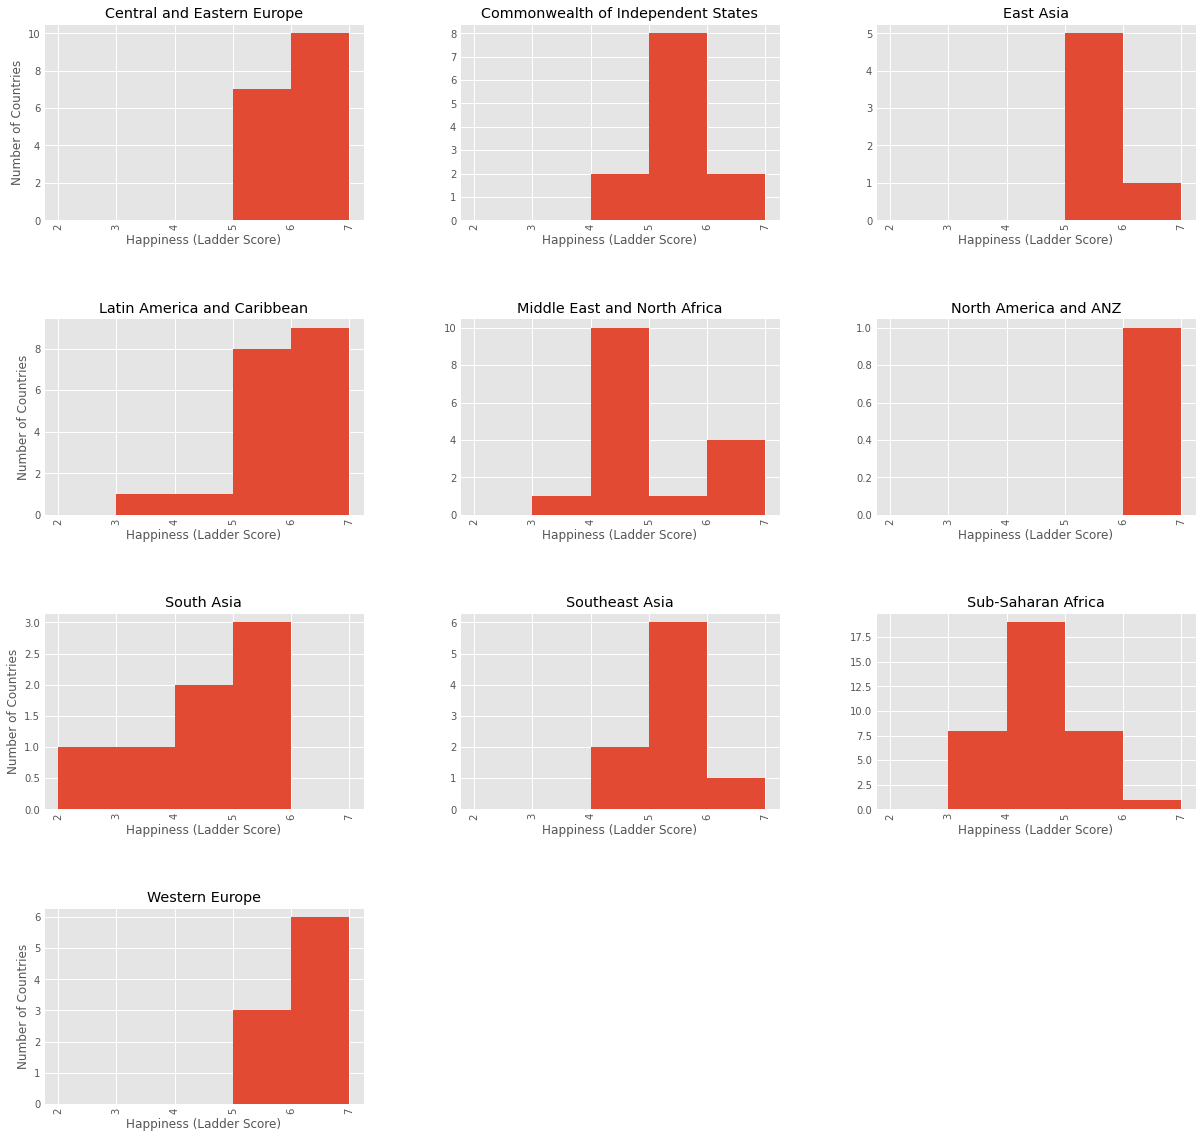

In [84]:
# Showing the distribution of happy and unhappy countries in each region

regional_happiness = df21.hist(column='ladder_score', by=df21['region'],figsize = (20, 20), bins=range(2,8))

# Labeling the Axes
regional_happiness[0][0].yaxis.set_label_text('Number of Countries')
regional_happiness[0][0].xaxis.set_label_text('Happiness (Ladder Score)')
regional_happiness[1][0].yaxis.set_label_text('Number of Countries')
regional_happiness[1][0].xaxis.set_label_text('Happiness (Ladder Score)')
regional_happiness[2][0].yaxis.set_label_text('Number of Countries')
regional_happiness[2][0].xaxis.set_label_text('Happiness (Ladder Score)')
regional_happiness[3][0].yaxis.set_label_text('Number of Countries')
regional_happiness[3][0].xaxis.set_label_text('Happiness (Ladder Score)')
regional_happiness[3][1].xaxis.set_label_text('Happiness (Ladder Score)')
regional_happiness[2][1].xaxis.set_label_text('Happiness (Ladder Score)')
regional_happiness[1][1].xaxis.set_label_text('Happiness (Ladder Score)')
regional_happiness[0][1].xaxis.set_label_text('Happiness (Ladder Score)')
regional_happiness[0][2].xaxis.set_label_text('Happiness (Ladder Score)')
regional_happiness[1][2].xaxis.set_label_text('Happiness (Ladder Score)')
regional_happiness[2][2].xaxis.set_label_text('Happiness (Ladder Score)')


These graphs show the distribution of happiness scores among countries in a given region, which gives more information than a simple mean. 

The happiness scores are calculated using a survey methodology called a **Cantril ladder:** asking respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. Respondents are then asked to rate their own current lives on that 0 to 10 scale.

Regions with more developing countries have a wider range of happiness scores (Latin America, the Middle East, South Asia and Sub-Saharan Africa) than more developed regions, which have lower variability in happiness scores (North America, Australia and New Zealand).

Given the way that Cantril ladders are calculated -- by asking respondents to imagine the best possible life for each individual -- it may be important to take into consideration that the range of possibility for respondents may vary by country and region. The greater the range of possibility a respondent can imagine, the lower this person may put him or herself; therefore ambition, social mobility, and relative happiness compared to neighbors, rather than absolute happiness in terms of current welfare, may be reflected in the ladder score across regions.  

---

**Note:** the y-axis in each subplot is not scaled equally. For example, there are far more countries in sub-Saharan Africa than in North America, Australia, and New Zealand. Thus, the area of the orange bar chart is a better representation of the distribution of happiness across a percentage of people within a region, than representing each country equally across all regions (if all subplots shared the same y-axis). This representation communicates better intuitively in measures of happiness levels by region than what would be shown by scaling each country equally, which results in some very happy regions appearing very small on this chart.

In [138]:
# Cleaning the data.

df21 = df21.rename(columns={'Ladder score':'ladder_score','Logged GDP per capita':'logged_gdp_per_cap',
                           'Healthy life expectancy':'life_exp', 'Country name':'country',
                           'Social support':'social_support', 'Regional indicator':'region',
                           'Freedom to make life choices':'freedom_life_choices',
                            'Regional Indicator':'region',
                            'Generosity': 'generosity',
                            'Perceptions of corruption': 'corruption' 
                            })

# Selecting by regions

europe = ['Western Europe', 'Central and Eastern Europe']
asia = ['East Asia', 'Southeast Asia', 'South Asia']
africa = ['Sub-Saharan Africa', 'Middle East and North Africa']
americas_and_oceania = ['North America and ANZ', 'Latin America and Caribbean']

# Storing correlation data
all_regions = ['Europe', 'Asia', 'Africa', 'Americas and Oceania']

In [147]:
factors = list(df21.columns)
factors.remove('country')
factors.remove('region')
factors.remove('ladder_score')
factors

['logged_gdp_per_cap',
 'social_support',
 'life_exp',
 'freedom_life_choices',
 'generosity',
 'corruption']

In [183]:
correlation_data = {}

for i in all_regions:
  correlation_data[i] = {}
  for j in factors:
    correlation_data[i][j] = {}

In [184]:
df_europe = df21.loc[df21['region'].isin(europe)]
df_asia = df21.loc[df21['region'].isin(asia)]
df_africa = df21.loc[df21['region'].isin(africa)]
df_americas_oceania = df21.loc[df21['region'].isin(americas_and_oceania)]

# EUROPE: factors with strongest correlations with happiness (ladder score)
df_europe.corr()

,ladder_score,logged_gdp_per_cap,social_support,life_exp,freedom_life_choices,generosity,corruption
ladder_score,1.000000,0.779132,0.662080,0.570317,0.708850,0.352378,-0.810358
logged_gdp_per_cap,0.779132,1.000000,0.614521,0.751163,0.534778,0.059310,-0.749410
social_support,0.662080,0.614521,1.000000,0.310467,0.486912,0.042773,-0.482756
life_exp,0.570317,0.751163,0.310467,1.000000,0.294106,0.070574,-0.563857
freedom_life_choices,0.708850,0.534778,0.486912,0.294106,1.000000,0.417858,-0.669356
generosity,0.352378,0.059310,0.042773,0.070574,0.417858,1.000000,-0.393593
corruption,-0.810358,-0.749410,-0.482756,-0.563857,-0.669356,-0.393593,1.000000


In Europe, it looks like the 'Ladder Score" correlates most strongly with (in order of positive correlation strength):

1. **GDP per capita** (0.7791) - very strong
2. **Freedom to make life choices** (0.7089) - strong
3. **Social Support** (0.6621) - strong
4. **Life expectancy** (0.5703) - strong
5. **Generosity** (0.3523) - moderate

There is also a very strong negative correlation between Ladder Score and Corruption. (-0.8103)

In [185]:
correlation_data['Europe']['logged_gdp_per_cap'] = 0.7791
correlation_data['Europe']['freedom_life_choices'] = 0.7089
correlation_data['Europe']['social_support'] = 0.6621
correlation_data['Europe']['life_exp'] = 0.5703
correlation_data['Europe']['generosity'] = 0.3523
correlation_data['Europe']['corruption'] = -0.8103

In [186]:
# ASIA: factors with strongest correlations with happiness (ladder score)

df_asia.corr()

,ladder_score,logged_gdp_per_cap,social_support,life_exp,freedom_life_choices,generosity,corruption
ladder_score,1.000000,0.714009,0.839963,0.691711,0.424236,-0.121697,-0.397864
logged_gdp_per_cap,0.714009,1.000000,0.689999,0.877532,0.137516,-0.219790,-0.557690
social_support,0.839963,0.689999,1.000000,0.699714,0.460956,0.013409,-0.267241
life_exp,0.691711,0.877532,0.699714,1.000000,0.226479,-0.350586,-0.568415
freedom_life_choices,0.424236,0.137516,0.460956,0.226479,1.000000,0.189069,-0.178171
generosity,-0.121697,-0.219790,0.013409,-0.350586,0.189069,1.000000,0.155783
corruption,-0.397864,-0.557690,-0.267241,-0.568415,-0.178171,0.155783,1.000000


In Asia, it looks like the 'Ladder Score" correlates most strongly with:

1. **Social Support** (0.8400) - very strong
2. **GDP per Capita** (0.7140) - strong
3. **Life Expectancy** (0.6917) - strong
4. **Freedom to Make Life Choices** (0.4242) - moderate

There is also a moderate negative correlation between Ladder Score and Corruption (-0.3979) and interestingly, a weak negative correlation between Ladder Score and Generosity (-0.1217).

In [187]:
correlation_data['Asia']['logged_gdp_per_cap'] = 0.7140
correlation_data['Asia']['freedom_life_choices'] = 0.7089
correlation_data['Asia']['social_support'] = 0.8400
correlation_data['Asia']['life_exp'] = 0.6917
correlation_data['Asia']['generosity'] = -0.1217
correlation_data['Asia']['corruption'] = -0.3979

In [188]:
# AFRICA: factors with strongest correlations with happiness (ladder score)

df_africa.corr()

,ladder_score,logged_gdp_per_cap,social_support,life_exp,freedom_life_choices,generosity,corruption
ladder_score,1.000000,0.646430,0.456635,0.512723,0.384441,0.059744,0.007996
logged_gdp_per_cap,0.646430,1.000000,0.700980,0.738800,0.266936,-0.336454,0.032229
social_support,0.456635,0.700980,1.000000,0.484861,0.143218,-0.247555,0.265018
life_exp,0.512723,0.738800,0.484861,1.000000,0.185787,-0.179241,-0.165759
freedom_life_choices,0.384441,0.266936,0.143218,0.185787,1.000000,0.121246,-0.373393
generosity,0.059744,-0.336454,-0.247555,-0.179241,0.121246,1.000000,-0.167734
corruption,0.007996,0.032229,0.265018,-0.165759,-0.373393,-0.167734,1.000000


In Africa, it looks like the 'Ladder Score" correlates most strongly with:

1. **GDP per Capita** (0.6464) - strong
2. **Life Expectancy** (0.5127) - moderately strong
3. **Social Support** (0.4666) - moderate
4. **Freedom to Make Life Choices** (0.3844) - moderately weak
5. **Generosity** (0.0597) - very weak

There also seems to be almost no correlation between Ladder Score and Corruption (0.008) in this calculation. The data may need to be further disaggregated to reveal more valuable insight.

In [189]:
correlation_data['Africa']['logged_gdp_per_cap'] = 0.6464
correlation_data['Africa']['freedom_life_choices'] = 0.3844
correlation_data['Africa']['social_support'] = 0.4666
correlation_data['Africa']['life_exp'] = 0.5127
correlation_data['Africa']['generosity'] = 0.0597
correlation_data['Africa']['corruption'] = 0.0008

In [190]:
# AMERICAS & OCEANIA: factors with strongest correlations with happiness (ladder score)

df_americas_oceania.corr()

,ladder_score,logged_gdp_per_cap,social_support,life_exp,freedom_life_choices,generosity,corruption
ladder_score,1.000000,0.799230,0.799067,0.855108,0.803253,-0.150326,-0.479175
logged_gdp_per_cap,0.799230,1.000000,0.826059,0.824249,0.516988,-0.159949,-0.444226
social_support,0.799067,0.826059,1.000000,0.862045,0.580252,-0.375741,-0.298891
life_exp,0.855108,0.824249,0.862045,1.000000,0.609010,-0.265286,-0.454512
freedom_life_choices,0.803253,0.516988,0.580252,0.609010,1.000000,-0.230891,-0.306027
generosity,-0.150326,-0.159949,-0.375741,-0.265286,-0.230891,1.000000,-0.517692
corruption,-0.479175,-0.444226,-0.298891,-0.454512,-0.306027,-0.517692,1.000000


In the Americas and Oceania, it looks like the 'Ladder Score" correlates most strongly with:

1. **Life Expectancy** (0.8551) - very strong
2. **Freedom to Make Life Choices** (0.8033) - strong
3. **GDP per Capita** (0.7992) - strong
4. **Social Support** (0.7991) - strong

There also seems to a moderately strong negative correlation between Ladder Score and Corruption (-0.4792), and a weak neagtive correlation between Ladder Score and Generosity (-0.1503).


In [191]:
correlation_data['Americas and Oceania']['logged_gdp_per_cap'] = 0.7992
correlation_data['Americas and Oceania']['freedom_life_choices'] = 0.8033
correlation_data['Americas and Oceania']['social_support'] = 0.7991
correlation_data['Americas and Oceania']['life_exp'] = 0.8551
correlation_data['Americas and Oceania']['generosity'] = -0.1503
correlation_data['Americas and Oceania']['corruption'] = -0.4792

In [192]:
correlation_table = pd.DataFrame(correlation_data)
correlation_table.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '15px'})

,Europe,Asia,Africa,Americas and Oceania
logged_gdp_per_cap,0.779100,0.714000,0.646400,0.799200
social_support,0.662100,0.840000,0.466600,0.799100
life_exp,0.570300,0.691700,0.512700,0.855100
freedom_life_choices,0.708900,0.708900,0.384400,0.803300
generosity,0.352300,-0.121700,0.059700,-0.150300
corruption,-0.810300,-0.397900,0.000800,-0.479200


In this colormap, the strongest factor correlated to happiness for each region is colored brightest yellow.

The color scale for each region goes from yellow (strongest) to green (moderate) and blue/purple (mild or negative).

It's easier to see through this color map that GDP per capita tends to be a most important factor in determining happiness, while Social Support and Life Expectancy tend to have a more moderate influence. Freedom to make life choices tends to have a weaker influence on happiness than the other three factors. Generosity and Corruption have little to no positive influence on happiness. Corruption has a very negative influence on happiness in Europe.

There is some variation between the importance of each factor on the region, with Europe and Americas-Oceania more closely resembling each other than Asia or Africa.

# Conclusions

## What makes people happy?

Overall, GDP per capita has the strongest correlation to happiness. Life expectancy, social supports, and freedom to make life choices have a more moderate correlation to happiness, whereas generosity and corruption have the least correlation with happiness. However, this varies by region. Specific countries may show different correlations in terms of which factors seem to track most closely with “ladder score,” or happiness, over time.

We chose to look at Afghanistan, Denmark, and the United States, as the least and most happy countries, and the country we live in.

### Afghanistan
In Afghanistan, the GDP per capita increased overall between 2008 and 2020, but people were becoming less happy overall, with notable drops in happiness after 2009 and 2016. This is better explained by looking at the decrease in life expectancy after 2014. The freedom to make life choices plummets in 2009 and again in 2016, coinciding with the increased military presence of U.S. and NATO troops in the region. The withdrawal of troops in 2014 seems to coincide with a drop in life expectancy. However, happiness spiked in 2014, showing that freedom to make life choices is more important than life expectancy on a micro-level in determining happiness in Afghanistan. “Give me liberty or give me death."

### United States
In the United States, GDP per capita steadily increased between 2009 and 2018, with a drop between 2018 and 2020. However, happiness has decreased overall between 2008 and 2016, with a large spike in 2012 and a small spike in 2017. Happiness decreased as GDP increased, until 2018, when happiness increased moderately as GDP decreased. Overall, life expectancy has been decreasing since 2010, with a rapid decline between 2015 and 2020. Freedom to make life choices seems to fluctuate dramatically in the United States, with marked drops and spikes in 2012 and 2016, but overall tracks closely with happiness score. In the United States, it seems that the drop in life expectancy is what correlates most strongly with the decrease in happiness over time, as the country struggles with increasing rates of opioid addiction and suicide.

### Denmark
In Denmark, GDP has been generally rising over time between 2009 and 2018, while happiness shows many rollercoasters on a downward trend until 2012, with a gradual rise between 2014 and 2019. However, on a local scale, it looks like happiness tends to increase as GDP per capita increases. A decrease in GDP per capita appears to follow or be accompanied by a decrease in happiness. Overall life expectancy is steadily increasing in Denmark. Freedom to make life choices seemed to have spiked in 2008 and 2019, and dipped in 2013, perhaps coinciding with the changes in government, but overall returning to an equal level as the beginning of the period. Denmark is ranked the second happiest country in the world, with high social support, and its growth in GDP per capita, combined with other lesser factors, seems to be the primary contributor to self-reported happiness. From this selective data, one might infer that in countries with high social support, a rise in GDP per capita correlates with a rise in overall happiness, but in countries with less social support, such as the United States and Afghanistan, the two factors do not necessarily correlate, as the distribution of wealth may not allow for equal gains across the population.

-------

There is a wider range in happiness scores in less developed regions, such as Sub-Saharan Africa, Latin America, the Middle East, and Asia, than in North America, Australia and New Zealand. The regions with greater range of happiness scores also tend to have lower happiness scores, perhaps also related to the nature of this surveying methodology, in which the "Cantril Ladder" is determined by self-reported imagination of possible happiness versus current happiness. This relative measure of happiness means that seeing your neighbors happier than you might make you report a lower happiness score, thereby multiplying an effect that already exists in how people tend to experience happiness. 

### Summary
Overall, while GDP per capita tends to be the strongest factor in correlation to happiness, there are regional differences, and interesting insights to be found by looking at changes within a country over time.

